### <p style="text-align: right;"> &#9989; Nathan Kurt</p>

#### <p style="text-align: right;"> &#9989; Cassie, Stephen, Nicole, Asra.</p>

# Day 16 In-class Assignment
# Get the Lead Out: Understanding The Water Crisis in Flint, MI
<img src="http://media2.govtech.com/images/940*627/Rusty+Corroded+Pipes.jpg" width=400px>


## Learning Goals:

Data analysis matters! Data analysis is something that can and should be used for (among other things): 

- [improving local government](http://www.codeforamerica.org)
- [improving the Federal government](https://www.whitehouse.gov/digital/united-states-digital-service)
- [serving humanity](http://www.datakind.org)

Data visualization is one of the most important parts of modeling - it gives us an intuitive understanding of the system we are interested in. How we represent data affects everything from to [understanding poverty in the developing world](http://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen) to [grappling with the global spread of lethal diseases](http://www.ted.com/talks/hans_rosling_the_truth_about_hiv). We want you to be able to find things out about the models you create and use visual information to make convincing arguments.

## Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.

---
### Visualizing Data
Before we get started with the data analysis, we want to cover the general concept of visualization. While you have found it easy to make really high quality plots with Python's matplotlib, a more important challenge is to be able to get information out of those plots and to tell a story to your audience. **Think about the issues in this list, discuss them in your group and find some examples from around the web to paste into this notebook - one or two examples for each bullet below. Try to find both good and bad examples**. The markdown cell below shows you one way that you can embed images in a notebook. 


Things to think about and look for:

* overuse of color, marker type, marker size, line type, line thickness: what do you feel is a good rule to use for use these attributes?
* adding information to your simple plots: how can you use marker size and/or color to add another dimension to your data presentation?
* color blindness: what types of color blindness are there and what are the best color palettes to use?
* Seaborn: today we will be using Seaborn; look at this [page](https://seaborn.pydata.org/tutorial/color_palettes.html) and discuss their thoughts on these issues.

Edit the mark down cell below to record your thoughts and embed some examples.

**Put some notes from your discussion here and include some example plots**

colors are cool and seaborn is kinda lame 

You can embed an image from the web using this structure in a markdown cell:
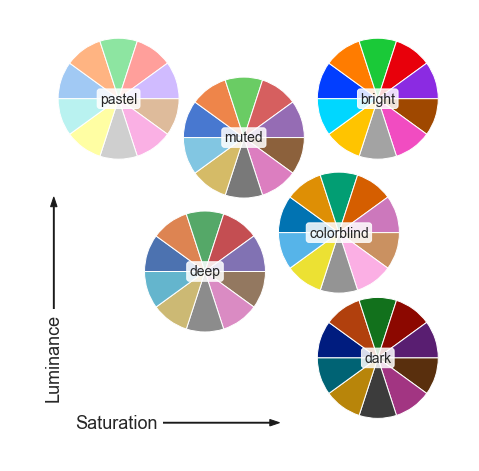


___
## Continuing our data science efforts!

Now, let's turn to back to data science! 

In the previous in-class we used Flint water quality data to practice Pandas; today, we will review some of that material and dig more deeply into the data. The difference is that today you are a data scientist and we want you to think about what the data is telling you, but still use coding to help you; and, use some of the visualization ideas you explored above.

We'll be looking at the publicly released [Flint Water Quality dataset](http://flintwaterstudy.org/2015/12/complete-dataset-lead-results-in-tap-water-for-271-flint-samples/). This is a dataset of nearly 300 tests run by volunteers at Virginia Tech on water samples obtained from Flint residents. You can learn more about their efforts [here](http://flintwaterstudy.org/about-page/about-us/). The water testing method involves collecting three different bottles worth of water at timed intervals; our analysis will focus on just the first collection at each testing site. 

You'll be considering the following questions in the context of U.S. Environmental Protection Agency (EPA) guidelines about lead contaminants, which state:

> Lead and copper are regulated by a treatment technique that requires systems to control the corrosiveness of their water. If more than 10% of tap water samples exceed the action level, water systems must take additional steps. For copper, the action level is 1.3 mg/L, and for lead is 0.015 mg/L. 
>
> Source: (http://www.epa.gov/your-drinking-water/table-regulated-drinking-water-contaminants#seven). 

**Talk through this EPA guideline with your group members and make sure you understand it. You will be searching through the data to explore whether or not the EPA guideline has been met, or not. **

Now, load in the libraries you need and the data, just as you did in the previous in-class assignment.

In [13]:
# Loading the data
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
import matplotlib.pyplot as plt
import numpy as np
import pandas

flint_data = pandas.read_json("""[{"SampleID":1,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":0.344,"Pb Bottle 2 (ppb) - 45 secs flushing":0.226,"Pb Bottle 3 (ppb) - 2 mins flushing":0.145},{"SampleID":2,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":8.133,"Pb Bottle 2 (ppb) - 45 secs flushing":10.77,"Pb Bottle 3 (ppb) - 2 mins flushing":2.761},{"SampleID":4,"Zip Code":48504,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.111,"Pb Bottle 2 (ppb) - 45 secs flushing":0.11,"Pb Bottle 3 (ppb) - 2 mins flushing":0.123},{"SampleID":5,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":8.007,"Pb Bottle 2 (ppb) - 45 secs flushing":7.446,"Pb Bottle 3 (ppb) - 2 mins flushing":3.384},{"SampleID":6,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":1.951,"Pb Bottle 2 (ppb) - 45 secs flushing":0.048,"Pb Bottle 3 (ppb) - 2 mins flushing":0.035},{"SampleID":7,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":7.2,"Pb Bottle 2 (ppb) - 45 secs flushing":1.4,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":8,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":40.63,"Pb Bottle 2 (ppb) - 45 secs flushing":9.726,"Pb Bottle 3 (ppb) - 2 mins flushing":6.132},{"SampleID":9,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":1.1,"Pb Bottle 2 (ppb) - 45 secs flushing":2.5,"Pb Bottle 3 (ppb) - 2 mins flushing":0.1},{"SampleID":12,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":10.6,"Pb Bottle 2 (ppb) - 45 secs flushing":1.038,"Pb Bottle 3 (ppb) - 2 mins flushing":1.294},{"SampleID":13,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":6.2,"Pb Bottle 2 (ppb) - 45 secs flushing":4.2,"Pb Bottle 3 (ppb) - 2 mins flushing":2.3},{"SampleID":15,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":4.358,"Pb Bottle 2 (ppb) - 45 secs flushing":0.822,"Pb Bottle 3 (ppb) - 2 mins flushing":0.147},{"SampleID":16,"Zip Code":48505,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":24.37,"Pb Bottle 2 (ppb) - 45 secs flushing":8.796,"Pb Bottle 3 (ppb) - 2 mins flushing":4.347},{"SampleID":17,"Zip Code":48505,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":6.609,"Pb Bottle 2 (ppb) - 45 secs flushing":5.752,"Pb Bottle 3 (ppb) - 2 mins flushing":1.433},{"SampleID":18,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":4.062,"Pb Bottle 2 (ppb) - 45 secs flushing":1.099,"Pb Bottle 3 (ppb) - 2 mins flushing":1.085},{"SampleID":19,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.484,"Pb Bottle 2 (ppb) - 45 secs flushing":0.72,"Pb Bottle 3 (ppb) - 2 mins flushing":0.565},{"SampleID":20,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.438,"Pb Bottle 2 (ppb) - 45 secs flushing":1.046,"Pb Bottle 3 (ppb) - 2 mins flushing":0.511},{"SampleID":21,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":1.29,"Pb Bottle 2 (ppb) - 45 secs flushing":0.243,"Pb Bottle 3 (ppb) - 2 mins flushing":0.225},{"SampleID":22,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":0.548,"Pb Bottle 2 (ppb) - 45 secs flushing":0.622,"Pb Bottle 3 (ppb) - 2 mins flushing":0.361},{"SampleID":23,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":3.131,"Pb Bottle 2 (ppb) - 45 secs flushing":0.674,"Pb Bottle 3 (ppb) - 2 mins flushing":0.683},{"SampleID":24,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":120,"Pb Bottle 2 (ppb) - 45 secs flushing":239.7,"Pb Bottle 3 (ppb) - 2 mins flushing":29.71},{"SampleID":25,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.911,"Pb Bottle 2 (ppb) - 45 secs flushing":0.406,"Pb Bottle 3 (ppb) - 2 mins flushing":0.237},{"SampleID":26,"Zip Code":48505,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":16.52,"Pb Bottle 2 (ppb) - 45 secs flushing":10.26,"Pb Bottle 3 (ppb) - 2 mins flushing":2.762},{"SampleID":27,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.984,"Pb Bottle 2 (ppb) - 45 secs flushing":1.13,"Pb Bottle 3 (ppb) - 2 mins flushing":0.712},{"SampleID":28,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":5.367,"Pb Bottle 2 (ppb) - 45 secs flushing":2.474,"Pb Bottle 3 (ppb) - 2 mins flushing":1.616},{"SampleID":29,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":5.5,"Pb Bottle 2 (ppb) - 45 secs flushing":8.4,"Pb Bottle 3 (ppb) - 2 mins flushing":2.4},{"SampleID":30,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.639,"Pb Bottle 2 (ppb) - 45 secs flushing":0.223,"Pb Bottle 3 (ppb) - 2 mins flushing":0.194},{"SampleID":31,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":6.087,"Pb Bottle 2 (ppb) - 45 secs flushing":28.87,"Pb Bottle 3 (ppb) - 2 mins flushing":2.13,"Notes":"*house sampled twice"},{"SampleID":31,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":10.32,"Pb Bottle 2 (ppb) - 45 secs flushing":13.47,"Pb Bottle 3 (ppb) - 2 mins flushing":18.19,"Notes":"*house sampled twice"},{"SampleID":33,"Zip Code":48503,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":66.88,"Pb Bottle 2 (ppb) - 45 secs flushing":2.662,"Pb Bottle 3 (ppb) - 2 mins flushing":2.082},{"SampleID":34,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":20.41,"Pb Bottle 2 (ppb) - 45 secs flushing":3.543,"Pb Bottle 3 (ppb) - 2 mins flushing":2.344},{"SampleID":35,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":109.6,"Pb Bottle 2 (ppb) - 45 secs flushing":80.47,"Pb Bottle 3 (ppb) - 2 mins flushing":94.52},{"SampleID":36,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":5.06,"Pb Bottle 2 (ppb) - 45 secs flushing":3.406,"Pb Bottle 3 (ppb) - 2 mins flushing":4.088},{"SampleID":37,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":2.774,"Pb Bottle 2 (ppb) - 45 secs flushing":0.21,"Pb Bottle 3 (ppb) - 2 mins flushing":0.264},{"SampleID":38,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":4.453,"Pb Bottle 2 (ppb) - 45 secs flushing":3.679,"Pb Bottle 3 (ppb) - 2 mins flushing":3.523},{"SampleID":39,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":0.4,"Pb Bottle 2 (ppb) - 45 secs flushing":0.3,"Pb Bottle 3 (ppb) - 2 mins flushing":0.7},{"SampleID":40,"Zip Code":48529,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.974,"Pb Bottle 2 (ppb) - 45 secs flushing":0.142,"Pb Bottle 3 (ppb) - 2 mins flushing":0.118},{"SampleID":41,"Zip Code":48505,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":3.228,"Pb Bottle 2 (ppb) - 45 secs flushing":2.534,"Pb Bottle 3 (ppb) - 2 mins flushing":2.222},{"SampleID":42,"Zip Code":48505,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":12.55,"Pb Bottle 2 (ppb) - 45 secs flushing":4.132,"Pb Bottle 3 (ppb) - 2 mins flushing":0.12},{"SampleID":43,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":0.501,"Pb Bottle 2 (ppb) - 45 secs flushing":0.156,"Pb Bottle 3 (ppb) - 2 mins flushing":15.14},{"SampleID":44,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":2.448,"Pb Bottle 2 (ppb) - 45 secs flushing":0.373,"Pb Bottle 3 (ppb) - 2 mins flushing":0.288},{"SampleID":45,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":5.508,"Pb Bottle 2 (ppb) - 45 secs flushing":5.157,"Pb Bottle 3 (ppb) - 2 mins flushing":2.621},{"SampleID":46,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":1.293,"Pb Bottle 2 (ppb) - 45 secs flushing":0.441,"Pb Bottle 3 (ppb) - 2 mins flushing":0.281},{"SampleID":47,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":4.699,"Pb Bottle 2 (ppb) - 45 secs flushing":1.395,"Pb Bottle 3 (ppb) - 2 mins flushing":0.329},{"SampleID":48,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":6.093,"Pb Bottle 2 (ppb) - 45 secs flushing":2.682,"Pb Bottle 3 (ppb) - 2 mins flushing":1.458},{"SampleID":49,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":0.8,"Pb Bottle 2 (ppb) - 45 secs flushing":0.8,"Pb Bottle 3 (ppb) - 2 mins flushing":0.5},{"SampleID":50,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":1.626,"Pb Bottle 2 (ppb) - 45 secs flushing":1.332,"Pb Bottle 3 (ppb) - 2 mins flushing":0.327},{"SampleID":51,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":2.576,"Pb Bottle 2 (ppb) - 45 secs flushing":2.852,"Pb Bottle 3 (ppb) - 2 mins flushing":1.48},{"SampleID":52,"Zip Code":48504,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.362,"Pb Bottle 2 (ppb) - 45 secs flushing":0.467,"Pb Bottle 3 (ppb) - 2 mins flushing":0.339},{"SampleID":53,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":1.585,"Pb Bottle 2 (ppb) - 45 secs flushing":0.494,"Pb Bottle 3 (ppb) - 2 mins flushing":1.232},{"SampleID":54,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":3.058,"Pb Bottle 2 (ppb) - 45 secs flushing":1.808,"Pb Bottle 3 (ppb) - 2 mins flushing":1.169},{"SampleID":55,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":2.423,"Pb Bottle 2 (ppb) - 45 secs flushing":0.393,"Pb Bottle 3 (ppb) - 2 mins flushing":0.373},{"SampleID":56,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":30.91,"Pb Bottle 2 (ppb) - 45 secs flushing":42.58,"Pb Bottle 3 (ppb) - 2 mins flushing":44.6},{"SampleID":57,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":4.47,"Pb Bottle 2 (ppb) - 45 secs flushing":3.649,"Pb Bottle 3 (ppb) - 2 mins flushing":1},{"SampleID":58,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.172,"Pb Bottle 2 (ppb) - 45 secs flushing":1.76,"Pb Bottle 3 (ppb) - 2 mins flushing":1.44},{"SampleID":59,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":1.8,"Pb Bottle 2 (ppb) - 45 secs flushing":0.5,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":63,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":0.965,"Pb Bottle 2 (ppb) - 45 secs flushing":0.166,"Pb Bottle 3 (ppb) - 2 mins flushing":0.319},{"SampleID":65,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":7.636,"Pb Bottle 2 (ppb) - 45 secs flushing":5.206,"Pb Bottle 3 (ppb) - 2 mins flushing":9.239},{"SampleID":66,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":3.158,"Pb Bottle 2 (ppb) - 45 secs flushing":1.948,"Pb Bottle 3 (ppb) - 2 mins flushing":2.802},{"SampleID":67,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":105.3,"Pb Bottle 2 (ppb) - 45 secs flushing":12.84,"Pb Bottle 3 (ppb) - 2 mins flushing":4.534},{"SampleID":68,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":4.476,"Pb Bottle 2 (ppb) - 45 secs flushing":0.355,"Pb Bottle 3 (ppb) - 2 mins flushing":0.334},{"SampleID":69,"Zip Code":48504,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.828,"Pb Bottle 2 (ppb) - 45 secs flushing":6.694,"Pb Bottle 3 (ppb) - 2 mins flushing":20.99},{"SampleID":71,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":2.481,"Pb Bottle 2 (ppb) - 45 secs flushing":3.86,"Pb Bottle 3 (ppb) - 2 mins flushing":24.64},{"SampleID":72,"Zip Code":48507,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":11.52,"Pb Bottle 2 (ppb) - 45 secs flushing":0.288,"Pb Bottle 3 (ppb) - 2 mins flushing":0.215},{"SampleID":73,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":3.784,"Pb Bottle 2 (ppb) - 45 secs flushing":0.292,"Pb Bottle 3 (ppb) - 2 mins flushing":0.258},{"SampleID":74,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":1.344,"Pb Bottle 2 (ppb) - 45 secs flushing":0.729,"Pb Bottle 3 (ppb) - 2 mins flushing":1.226},{"SampleID":75,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":11.93,"Pb Bottle 2 (ppb) - 45 secs flushing":9.645,"Pb Bottle 3 (ppb) - 2 mins flushing":3.514},{"SampleID":76,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":10.96,"Pb Bottle 2 (ppb) - 45 secs flushing":7.744,"Pb Bottle 3 (ppb) - 2 mins flushing":4.16},{"SampleID":77,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":3.341,"Pb Bottle 2 (ppb) - 45 secs flushing":0.555,"Pb Bottle 3 (ppb) - 2 mins flushing":0.917},{"SampleID":78,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":1.229,"Pb Bottle 2 (ppb) - 45 secs flushing":1.192,"Pb Bottle 3 (ppb) - 2 mins flushing":0.218},{"SampleID":79,"Zip Code":48503,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":6.3,"Pb Bottle 2 (ppb) - 45 secs flushing":1.1,"Pb Bottle 3 (ppb) - 2 mins flushing":0.3,"Notes":"*house sampled twice"},{"SampleID":79,"Zip Code":48503,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":5.153,"Pb Bottle 2 (ppb) - 45 secs flushing":0.385,"Pb Bottle 3 (ppb) - 2 mins flushing":0.322,"Notes":"*house sampled twice"},{"SampleID":80,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":6.054,"Pb Bottle 2 (ppb) - 45 secs flushing":0.927,"Pb Bottle 3 (ppb) - 2 mins flushing":0.676},{"SampleID":82,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":31.14,"Pb Bottle 2 (ppb) - 45 secs flushing":4.73,"Pb Bottle 3 (ppb) - 2 mins flushing":3.188},{"SampleID":83,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":102.7,"Pb Bottle 2 (ppb) - 45 secs flushing":9.894,"Pb Bottle 3 (ppb) - 2 mins flushing":3.133},{"SampleID":84,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":1.38,"Pb Bottle 2 (ppb) - 45 secs flushing":3.734,"Pb Bottle 3 (ppb) - 2 mins flushing":0.524},{"SampleID":85,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":1.132,"Pb Bottle 2 (ppb) - 45 secs flushing":2.17,"Pb Bottle 3 (ppb) - 2 mins flushing":0.465},{"SampleID":87,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":3.232,"Pb Bottle 2 (ppb) - 45 secs flushing":2.989,"Pb Bottle 3 (ppb) - 2 mins flushing":1.927},{"SampleID":88,"Zip Code":48532,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":0.507,"Pb Bottle 2 (ppb) - 45 secs flushing":2.315,"Pb Bottle 3 (ppb) - 2 mins flushing":0.231},{"SampleID":90,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":8.561,"Pb Bottle 2 (ppb) - 45 secs flushing":5.141,"Pb Bottle 3 (ppb) - 2 mins flushing":4.724},{"SampleID":91,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":9.997,"Pb Bottle 2 (ppb) - 45 secs flushing":0.983,"Pb Bottle 3 (ppb) - 2 mins flushing":0.611},{"SampleID":92,"Zip Code":48504,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":4.152,"Pb Bottle 2 (ppb) - 45 secs flushing":0.758,"Pb Bottle 3 (ppb) - 2 mins flushing":0.433},{"SampleID":93,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":75.82,"Pb Bottle 2 (ppb) - 45 secs flushing":11.65,"Pb Bottle 3 (ppb) - 2 mins flushing":3.942},{"SampleID":95,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":138.8,"Pb Bottle 2 (ppb) - 45 secs flushing":2.745,"Pb Bottle 3 (ppb) - 2 mins flushing":0.797},{"SampleID":96,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.8,"Pb Bottle 2 (ppb) - 45 secs flushing":0.2,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":97,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":7.244,"Pb Bottle 2 (ppb) - 45 secs flushing":1051,"Pb Bottle 3 (ppb) - 2 mins flushing":1.328},{"SampleID":98,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":1.621,"Pb Bottle 2 (ppb) - 45 secs flushing":0.3,"Pb Bottle 3 (ppb) - 2 mins flushing":0.238},{"SampleID":99,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.032,"Pb Bottle 2 (ppb) - 45 secs flushing":0.363,"Pb Bottle 3 (ppb) - 2 mins flushing":0.216},{"SampleID":100,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":0.866,"Pb Bottle 2 (ppb) - 45 secs flushing":0.292,"Pb Bottle 3 (ppb) - 2 mins flushing":0.269},{"SampleID":101,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":2.525,"Pb Bottle 2 (ppb) - 45 secs flushing":0.59,"Pb Bottle 3 (ppb) - 2 mins flushing":0.438},{"SampleID":102,"Zip Code":48505,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":9.408,"Pb Bottle 2 (ppb) - 45 secs flushing":4.444,"Pb Bottle 3 (ppb) - 2 mins flushing":3.935},{"SampleID":103,"Zip Code":48505,"Ward":0,"Pb Bottle 1 (ppb) - First Draw":0.739,"Pb Bottle 2 (ppb) - 45 secs flushing":4.883,"Pb Bottle 3 (ppb) - 2 mins flushing":0.953},{"SampleID":104,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":0.9,"Pb Bottle 2 (ppb) - 45 secs flushing":0.2,"Pb Bottle 3 (ppb) - 2 mins flushing":0.1},{"SampleID":105,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":1.403,"Pb Bottle 2 (ppb) - 45 secs flushing":0.142,"Pb Bottle 3 (ppb) - 2 mins flushing":0.121},{"SampleID":106,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":5.655,"Pb Bottle 2 (ppb) - 45 secs flushing":5.882,"Pb Bottle 3 (ppb) - 2 mins flushing":10.66},{"SampleID":107,"Zip Code":48505,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":31.06,"Pb Bottle 2 (ppb) - 45 secs flushing":8.578,"Pb Bottle 3 (ppb) - 2 mins flushing":3.176},{"SampleID":108,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.469,"Pb Bottle 2 (ppb) - 45 secs flushing":0.291,"Pb Bottle 3 (ppb) - 2 mins flushing":0.25},{"SampleID":109,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":23.85,"Pb Bottle 2 (ppb) - 45 secs flushing":2.301,"Pb Bottle 3 (ppb) - 2 mins flushing":1.62},{"SampleID":110,"Zip Code":48505,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":9.766,"Pb Bottle 2 (ppb) - 45 secs flushing":11.13,"Pb Bottle 3 (ppb) - 2 mins flushing":7.144},{"SampleID":111,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":4.69,"Pb Bottle 2 (ppb) - 45 secs flushing":0.953,"Pb Bottle 3 (ppb) - 2 mins flushing":0.929},{"SampleID":112,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":4.066,"Pb Bottle 2 (ppb) - 45 secs flushing":5.894,"Pb Bottle 3 (ppb) - 2 mins flushing":4.76},{"SampleID":113,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":0.846,"Pb Bottle 2 (ppb) - 45 secs flushing":0.455,"Pb Bottle 3 (ppb) - 2 mins flushing":0.366},{"SampleID":114,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.054,"Pb Bottle 2 (ppb) - 45 secs flushing":3.978,"Pb Bottle 3 (ppb) - 2 mins flushing":0.355},{"SampleID":115,"Zip Code":48506,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":3.744,"Pb Bottle 2 (ppb) - 45 secs flushing":5.592,"Pb Bottle 3 (ppb) - 2 mins flushing":2.476},{"SampleID":116,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":12.9,"Pb Bottle 2 (ppb) - 45 secs flushing":2.202,"Pb Bottle 3 (ppb) - 2 mins flushing":1.667},{"SampleID":117,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":0.543,"Pb Bottle 2 (ppb) - 45 secs flushing":0.183,"Pb Bottle 3 (ppb) - 2 mins flushing":0.162},{"SampleID":118,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":6.877,"Pb Bottle 2 (ppb) - 45 secs flushing":2.984,"Pb Bottle 3 (ppb) - 2 mins flushing":2.201},{"SampleID":119,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":0.552,"Pb Bottle 2 (ppb) - 45 secs flushing":0.19,"Pb Bottle 3 (ppb) - 2 mins flushing":0.205},{"SampleID":121,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":59,"Pb Bottle 2 (ppb) - 45 secs flushing":2.9,"Pb Bottle 3 (ppb) - 2 mins flushing":0.5},{"SampleID":122,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.349,"Pb Bottle 2 (ppb) - 45 secs flushing":0.13,"Pb Bottle 3 (ppb) - 2 mins flushing":0.131},{"SampleID":123,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":4.764,"Pb Bottle 2 (ppb) - 45 secs flushing":1.388,"Pb Bottle 3 (ppb) - 2 mins flushing":1.06},{"SampleID":124,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.832,"Pb Bottle 2 (ppb) - 45 secs flushing":0.284,"Pb Bottle 3 (ppb) - 2 mins flushing":0.214},{"SampleID":125,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.224,"Pb Bottle 2 (ppb) - 45 secs flushing":0.568,"Pb Bottle 3 (ppb) - 2 mins flushing":0.465},{"SampleID":126,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":15.9,"Pb Bottle 2 (ppb) - 45 secs flushing":3.7,"Pb Bottle 3 (ppb) - 2 mins flushing":2.2},{"SampleID":127,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":5.667,"Pb Bottle 2 (ppb) - 45 secs flushing":1.405,"Pb Bottle 3 (ppb) - 2 mins flushing":0.896},{"SampleID":128,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":3.564,"Pb Bottle 2 (ppb) - 45 secs flushing":2.767,"Pb Bottle 3 (ppb) - 2 mins flushing":2.127},{"SampleID":129,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.475,"Pb Bottle 2 (ppb) - 45 secs flushing":0.2,"Pb Bottle 3 (ppb) - 2 mins flushing":0.268},{"SampleID":130,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":5.3,"Pb Bottle 2 (ppb) - 45 secs flushing":0.5,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":131,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.166,"Pb Bottle 2 (ppb) - 45 secs flushing":0.736,"Pb Bottle 3 (ppb) - 2 mins flushing":0.269},{"SampleID":132,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.684,"Pb Bottle 2 (ppb) - 45 secs flushing":0.306,"Pb Bottle 3 (ppb) - 2 mins flushing":0.094},{"SampleID":133,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":6.347,"Pb Bottle 2 (ppb) - 45 secs flushing":1.724,"Pb Bottle 3 (ppb) - 2 mins flushing":0.678},{"SampleID":134,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":10.56,"Pb Bottle 2 (ppb) - 45 secs flushing":5.672,"Pb Bottle 3 (ppb) - 2 mins flushing":4.813},{"SampleID":135,"Zip Code":48502,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":2.273,"Pb Bottle 2 (ppb) - 45 secs flushing":2.808,"Pb Bottle 3 (ppb) - 2 mins flushing":3.048},{"SampleID":136,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.571,"Pb Bottle 2 (ppb) - 45 secs flushing":1.265,"Pb Bottle 3 (ppb) - 2 mins flushing":0.316},{"SampleID":137,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":5.402,"Pb Bottle 2 (ppb) - 45 secs flushing":4.196,"Pb Bottle 3 (ppb) - 2 mins flushing":1.945},{"SampleID":138,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":43.19,"Pb Bottle 2 (ppb) - 45 secs flushing":7.688,"Pb Bottle 3 (ppb) - 2 mins flushing":4.39},{"SampleID":139,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":1.492,"Pb Bottle 2 (ppb) - 45 secs flushing":1.409,"Pb Bottle 3 (ppb) - 2 mins flushing":0.378},{"SampleID":140,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":66.24,"Pb Bottle 2 (ppb) - 45 secs flushing":17.75,"Pb Bottle 3 (ppb) - 2 mins flushing":8.815},{"SampleID":141,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.799,"Pb Bottle 2 (ppb) - 45 secs flushing":0.032,"Pb Bottle 3 (ppb) - 2 mins flushing":0.031},{"SampleID":142,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":1.861,"Pb Bottle 2 (ppb) - 45 secs flushing":1.355,"Pb Bottle 3 (ppb) - 2 mins flushing":0.64},{"SampleID":143,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":2.672,"Pb Bottle 2 (ppb) - 45 secs flushing":2.001,"Pb Bottle 3 (ppb) - 2 mins flushing":1.094},{"SampleID":144,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":3.741,"Pb Bottle 2 (ppb) - 45 secs flushing":1.211,"Pb Bottle 3 (ppb) - 2 mins flushing":0.258},{"SampleID":145,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.934,"Pb Bottle 2 (ppb) - 45 secs flushing":0.374,"Pb Bottle 3 (ppb) - 2 mins flushing":0.424},{"SampleID":146,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":27.05,"Pb Bottle 2 (ppb) - 45 secs flushing":0.902,"Pb Bottle 3 (ppb) - 2 mins flushing":0.61},{"SampleID":147,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.174,"Pb Bottle 2 (ppb) - 45 secs flushing":0.291,"Pb Bottle 3 (ppb) - 2 mins flushing":4.055},{"SampleID":148,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.325,"Pb Bottle 2 (ppb) - 45 secs flushing":1.099,"Pb Bottle 3 (ppb) - 2 mins flushing":0.466},{"SampleID":149,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.966,"Pb Bottle 2 (ppb) - 45 secs flushing":0.253,"Pb Bottle 3 (ppb) - 2 mins flushing":0.201},{"SampleID":150,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.959,"Pb Bottle 2 (ppb) - 45 secs flushing":0.438,"Pb Bottle 3 (ppb) - 2 mins flushing":0.448},{"SampleID":151,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.823,"Pb Bottle 2 (ppb) - 45 secs flushing":1.881,"Pb Bottle 3 (ppb) - 2 mins flushing":0.412},{"SampleID":152,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":11.2,"Pb Bottle 2 (ppb) - 45 secs flushing":7.553,"Pb Bottle 3 (ppb) - 2 mins flushing":12.21},{"SampleID":153,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":5.668,"Pb Bottle 2 (ppb) - 45 secs flushing":3.341,"Pb Bottle 3 (ppb) - 2 mins flushing":3.268},{"SampleID":154,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":6.261,"Pb Bottle 2 (ppb) - 45 secs flushing":1.316,"Pb Bottle 3 (ppb) - 2 mins flushing":0.5},{"SampleID":155,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":4.797,"Pb Bottle 2 (ppb) - 45 secs flushing":1.594,"Pb Bottle 3 (ppb) - 2 mins flushing":1.264},{"SampleID":156,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.64,"Pb Bottle 2 (ppb) - 45 secs flushing":0.905,"Pb Bottle 3 (ppb) - 2 mins flushing":0.151},{"SampleID":158,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":8.713,"Pb Bottle 2 (ppb) - 45 secs flushing":2.799,"Pb Bottle 3 (ppb) - 2 mins flushing":50.97},{"SampleID":159,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.544,"Pb Bottle 2 (ppb) - 45 secs flushing":1.099,"Pb Bottle 3 (ppb) - 2 mins flushing":0.498},{"SampleID":161,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.41,"Pb Bottle 2 (ppb) - 45 secs flushing":0.096,"Pb Bottle 3 (ppb) - 2 mins flushing":0.116},{"SampleID":162,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":32.85,"Pb Bottle 2 (ppb) - 45 secs flushing":35.76,"Pb Bottle 3 (ppb) - 2 mins flushing":9.103},{"SampleID":163,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":12.87,"Pb Bottle 2 (ppb) - 45 secs flushing":14.87,"Pb Bottle 3 (ppb) - 2 mins flushing":6.326},{"SampleID":164,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":38.02,"Pb Bottle 2 (ppb) - 45 secs flushing":38.7,"Pb Bottle 3 (ppb) - 2 mins flushing":38.94},{"SampleID":165,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.435,"Pb Bottle 2 (ppb) - 45 secs flushing":8.183,"Pb Bottle 3 (ppb) - 2 mins flushing":1.296},{"SampleID":166,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.997,"Pb Bottle 2 (ppb) - 45 secs flushing":1.867,"Pb Bottle 3 (ppb) - 2 mins flushing":1.512},{"SampleID":167,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":11,"Pb Bottle 2 (ppb) - 45 secs flushing":10.53,"Pb Bottle 3 (ppb) - 2 mins flushing":8.688},{"SampleID":168,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":6.219,"Pb Bottle 2 (ppb) - 45 secs flushing":12.33,"Pb Bottle 3 (ppb) - 2 mins flushing":4.202},{"SampleID":169,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":8.8,"Pb Bottle 2 (ppb) - 45 secs flushing":3.1,"Pb Bottle 3 (ppb) - 2 mins flushing":4.5},{"SampleID":170,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":8.071,"Pb Bottle 2 (ppb) - 45 secs flushing":0.947,"Pb Bottle 3 (ppb) - 2 mins flushing":0.839},{"SampleID":171,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":3.262,"Pb Bottle 2 (ppb) - 45 secs flushing":0.453,"Pb Bottle 3 (ppb) - 2 mins flushing":0.252},{"SampleID":172,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":2.267,"Pb Bottle 2 (ppb) - 45 secs flushing":0.541,"Pb Bottle 3 (ppb) - 2 mins flushing":0.391},{"SampleID":173,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":0.922,"Pb Bottle 2 (ppb) - 45 secs flushing":0.878,"Pb Bottle 3 (ppb) - 2 mins flushing":0.491},{"SampleID":174,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":27.02,"Pb Bottle 2 (ppb) - 45 secs flushing":31.25,"Pb Bottle 3 (ppb) - 2 mins flushing":11.37},{"SampleID":176,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":0.906,"Pb Bottle 2 (ppb) - 45 secs flushing":0.961,"Pb Bottle 3 (ppb) - 2 mins flushing":1.052},{"SampleID":177,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.85,"Pb Bottle 2 (ppb) - 45 secs flushing":6.862,"Pb Bottle 3 (ppb) - 2 mins flushing":0.951},{"SampleID":178,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":1.852,"Pb Bottle 2 (ppb) - 45 secs flushing":0.472,"Pb Bottle 3 (ppb) - 2 mins flushing":0.422},{"SampleID":179,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":5.35,"Pb Bottle 2 (ppb) - 45 secs flushing":1.328,"Pb Bottle 3 (ppb) - 2 mins flushing":0.595},{"SampleID":180,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":25.21,"Pb Bottle 2 (ppb) - 45 secs flushing":4.337,"Pb Bottle 3 (ppb) - 2 mins flushing":1.019},{"SampleID":182,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":15.55,"Pb Bottle 2 (ppb) - 45 secs flushing":3.962,"Pb Bottle 3 (ppb) - 2 mins flushing":1.861},{"SampleID":183,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.793,"Pb Bottle 2 (ppb) - 45 secs flushing":0.533,"Pb Bottle 3 (ppb) - 2 mins flushing":0.391},{"SampleID":184,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":5.068,"Pb Bottle 2 (ppb) - 45 secs flushing":0.683,"Pb Bottle 3 (ppb) - 2 mins flushing":0.489},{"SampleID":185,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":26.64,"Pb Bottle 2 (ppb) - 45 secs flushing":8.878,"Pb Bottle 3 (ppb) - 2 mins flushing":6.619},{"SampleID":186,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.867,"Pb Bottle 2 (ppb) - 45 secs flushing":0.165,"Pb Bottle 3 (ppb) - 2 mins flushing":0.175},{"SampleID":189,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":19.16,"Pb Bottle 2 (ppb) - 45 secs flushing":12.54,"Pb Bottle 3 (ppb) - 2 mins flushing":7.719},{"SampleID":191,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":28.7,"Pb Bottle 2 (ppb) - 45 secs flushing":12.7,"Pb Bottle 3 (ppb) - 2 mins flushing":8.6},{"SampleID":192,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":20.22,"Pb Bottle 2 (ppb) - 45 secs flushing":8.908,"Pb Bottle 3 (ppb) - 2 mins flushing":6.677},{"SampleID":193,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":2.9,"Pb Bottle 2 (ppb) - 45 secs flushing":0.6,"Pb Bottle 3 (ppb) - 2 mins flushing":0.7},{"SampleID":194,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":18.86,"Pb Bottle 2 (ppb) - 45 secs flushing":5.051,"Pb Bottle 3 (ppb) - 2 mins flushing":2.548},{"SampleID":195,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.816,"Pb Bottle 2 (ppb) - 45 secs flushing":0.324,"Pb Bottle 3 (ppb) - 2 mins flushing":0.362},{"SampleID":196,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":118.4,"Pb Bottle 2 (ppb) - 45 secs flushing":40.78,"Pb Bottle 3 (ppb) - 2 mins flushing":39.99},{"SampleID":197,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":27.45,"Pb Bottle 2 (ppb) - 45 secs flushing":0.939,"Pb Bottle 3 (ppb) - 2 mins flushing":0.533},{"SampleID":198,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.2,"Pb Bottle 2 (ppb) - 45 secs flushing":0.1,"Pb Bottle 3 (ppb) - 2 mins flushing":0.1},{"SampleID":200,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":4.681,"Pb Bottle 2 (ppb) - 45 secs flushing":0.755,"Pb Bottle 3 (ppb) - 2 mins flushing":0.456},{"SampleID":201,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":11.57,"Pb Bottle 2 (ppb) - 45 secs flushing":6.08,"Pb Bottle 3 (ppb) - 2 mins flushing":1.782},{"SampleID":202,"Zip Code":48532,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":6.557,"Pb Bottle 2 (ppb) - 45 secs flushing":0.289,"Pb Bottle 3 (ppb) - 2 mins flushing":0.371},{"SampleID":203,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":3.4,"Pb Bottle 2 (ppb) - 45 secs flushing":9.6,"Pb Bottle 3 (ppb) - 2 mins flushing":1.7},{"SampleID":204,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":0.7,"Pb Bottle 2 (ppb) - 45 secs flushing":0.2,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":205,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":158,"Pb Bottle 2 (ppb) - 45 secs flushing":90.83,"Pb Bottle 3 (ppb) - 2 mins flushing":91.69},{"SampleID":206,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":0.977,"Pb Bottle 2 (ppb) - 45 secs flushing":0.47,"Pb Bottle 3 (ppb) - 2 mins flushing":0.381},{"SampleID":207,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":8.471,"Pb Bottle 2 (ppb) - 45 secs flushing":4.692,"Pb Bottle 3 (ppb) - 2 mins flushing":1.48},{"SampleID":208,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":11.47,"Pb Bottle 2 (ppb) - 45 secs flushing":23.15,"Pb Bottle 3 (ppb) - 2 mins flushing":7.129},{"SampleID":209,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":5.228,"Pb Bottle 2 (ppb) - 45 secs flushing":2.477,"Pb Bottle 3 (ppb) - 2 mins flushing":1.014},{"SampleID":210,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.956,"Pb Bottle 2 (ppb) - 45 secs flushing":0.196,"Pb Bottle 3 (ppb) - 2 mins flushing":0.157},{"SampleID":211,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":1.671,"Pb Bottle 2 (ppb) - 45 secs flushing":0.405,"Pb Bottle 3 (ppb) - 2 mins flushing":4.721},{"SampleID":212,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":1.152,"Pb Bottle 2 (ppb) - 45 secs flushing":0.708,"Pb Bottle 3 (ppb) - 2 mins flushing":0.282},{"SampleID":213,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.5,"Pb Bottle 2 (ppb) - 45 secs flushing":0.1,"Pb Bottle 3 (ppb) - 2 mins flushing":0.1},{"SampleID":214,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":10.74,"Pb Bottle 2 (ppb) - 45 secs flushing":2.331,"Pb Bottle 3 (ppb) - 2 mins flushing":1.628},{"SampleID":215,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":3.9,"Pb Bottle 2 (ppb) - 45 secs flushing":0.4,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":216,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":2.149,"Pb Bottle 2 (ppb) - 45 secs flushing":0.368,"Pb Bottle 3 (ppb) - 2 mins flushing":0.333},{"SampleID":217,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":1.1,"Pb Bottle 2 (ppb) - 45 secs flushing":0.4,"Pb Bottle 3 (ppb) - 2 mins flushing":0.2},{"SampleID":218,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":7.087,"Pb Bottle 2 (ppb) - 45 secs flushing":9.467,"Pb Bottle 3 (ppb) - 2 mins flushing":1.28},{"SampleID":219,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.329,"Pb Bottle 2 (ppb) - 45 secs flushing":0.609,"Pb Bottle 3 (ppb) - 2 mins flushing":0.527},{"SampleID":220,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":6.2,"Pb Bottle 2 (ppb) - 45 secs flushing":0.7,"Pb Bottle 3 (ppb) - 2 mins flushing":0.6},{"SampleID":221,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":0.8,"Pb Bottle 2 (ppb) - 45 secs flushing":0.26,"Pb Bottle 3 (ppb) - 2 mins flushing":0.255},{"SampleID":222,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":9.3,"Pb Bottle 2 (ppb) - 45 secs flushing":9.7,"Pb Bottle 3 (ppb) - 2 mins flushing":5},{"SampleID":223,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":2.1,"Pb Bottle 2 (ppb) - 45 secs flushing":1.2,"Pb Bottle 3 (ppb) - 2 mins flushing":0.5},{"SampleID":224,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":4.563,"Pb Bottle 2 (ppb) - 45 secs flushing":3.106,"Pb Bottle 3 (ppb) - 2 mins flushing":2.997},{"SampleID":225,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":4.808,"Pb Bottle 2 (ppb) - 45 secs flushing":6.196,"Pb Bottle 3 (ppb) - 2 mins flushing":1.523},{"SampleID":226,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":0.753,"Pb Bottle 2 (ppb) - 45 secs flushing":2.526,"Pb Bottle 3 (ppb) - 2 mins flushing":0.549},{"SampleID":227,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":1.862,"Pb Bottle 2 (ppb) - 45 secs flushing":1.213,"Pb Bottle 3 (ppb) - 2 mins flushing":0.898},{"SampleID":228,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.183,"Pb Bottle 2 (ppb) - 45 secs flushing":0.366,"Pb Bottle 3 (ppb) - 2 mins flushing":0.201},{"SampleID":229,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":8.2,"Pb Bottle 2 (ppb) - 45 secs flushing":3.2,"Pb Bottle 3 (ppb) - 2 mins flushing":2.6},{"SampleID":230,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":3.679,"Pb Bottle 2 (ppb) - 45 secs flushing":0.498,"Pb Bottle 3 (ppb) - 2 mins flushing":0.288},{"SampleID":231,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.37,"Pb Bottle 2 (ppb) - 45 secs flushing":7.333,"Pb Bottle 3 (ppb) - 2 mins flushing":3.797},{"SampleID":234,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":0.828,"Pb Bottle 2 (ppb) - 45 secs flushing":1.318,"Pb Bottle 3 (ppb) - 2 mins flushing":0.233},{"SampleID":235,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":0.719,"Pb Bottle 2 (ppb) - 45 secs flushing":0.254,"Pb Bottle 3 (ppb) - 2 mins flushing":0.058},{"SampleID":236,"Zip Code":48504,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":2.822,"Pb Bottle 2 (ppb) - 45 secs flushing":1.221,"Pb Bottle 3 (ppb) - 2 mins flushing":0.258},{"SampleID":237,"Zip Code":48504,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":2.867,"Pb Bottle 2 (ppb) - 45 secs flushing":0.723,"Pb Bottle 3 (ppb) - 2 mins flushing":0.744},{"SampleID":238,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":2.332,"Pb Bottle 2 (ppb) - 45 secs flushing":3.588,"Pb Bottle 3 (ppb) - 2 mins flushing":1.221},{"SampleID":240,"Zip Code":48503,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":4.401,"Pb Bottle 2 (ppb) - 45 secs flushing":2.111,"Pb Bottle 3 (ppb) - 2 mins flushing":1.572},{"SampleID":241,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":2.708,"Pb Bottle 2 (ppb) - 45 secs flushing":2.238,"Pb Bottle 3 (ppb) - 2 mins flushing":0.809},{"SampleID":242,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":34.13,"Pb Bottle 2 (ppb) - 45 secs flushing":6.002,"Pb Bottle 3 (ppb) - 2 mins flushing":1.71},{"SampleID":243,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":5.218,"Pb Bottle 2 (ppb) - 45 secs flushing":2.614,"Pb Bottle 3 (ppb) - 2 mins flushing":0.831},{"SampleID":244,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":15.73,"Pb Bottle 2 (ppb) - 45 secs flushing":13.95,"Pb Bottle 3 (ppb) - 2 mins flushing":3.584},{"SampleID":245,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":3.045,"Pb Bottle 2 (ppb) - 45 secs flushing":2.744,"Pb Bottle 3 (ppb) - 2 mins flushing":0.299},{"SampleID":246,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.1,"Pb Bottle 2 (ppb) - 45 secs flushing":0.5,"Pb Bottle 3 (ppb) - 2 mins flushing":0.3},{"SampleID":247,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.386,"Pb Bottle 2 (ppb) - 45 secs flushing":0.288,"Pb Bottle 3 (ppb) - 2 mins flushing":0.432},{"SampleID":248,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":0.915,"Pb Bottle 2 (ppb) - 45 secs flushing":0.354,"Pb Bottle 3 (ppb) - 2 mins flushing":0.306},{"SampleID":249,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":2.145,"Pb Bottle 2 (ppb) - 45 secs flushing":0.345,"Pb Bottle 3 (ppb) - 2 mins flushing":3.738},{"SampleID":250,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":4.056,"Pb Bottle 2 (ppb) - 45 secs flushing":0.547,"Pb Bottle 3 (ppb) - 2 mins flushing":0.378},{"SampleID":251,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.668,"Pb Bottle 2 (ppb) - 45 secs flushing":1.508,"Pb Bottle 3 (ppb) - 2 mins flushing":2.72},{"SampleID":252,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":7.575,"Pb Bottle 2 (ppb) - 45 secs flushing":1.362,"Pb Bottle 3 (ppb) - 2 mins flushing":1.094},{"SampleID":253,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":5.59,"Pb Bottle 2 (ppb) - 45 secs flushing":4.306,"Pb Bottle 3 (ppb) - 2 mins flushing":2.019},{"SampleID":254,"Zip Code":48503,"Ward":5,"Pb Bottle 1 (ppb) - First Draw":0.708,"Pb Bottle 2 (ppb) - 45 secs flushing":0.326,"Pb Bottle 3 (ppb) - 2 mins flushing":0.303},{"SampleID":255,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":1.701,"Pb Bottle 2 (ppb) - 45 secs flushing":4.397,"Pb Bottle 3 (ppb) - 2 mins flushing":1.287},{"SampleID":256,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":1.467,"Pb Bottle 2 (ppb) - 45 secs flushing":0.149,"Pb Bottle 3 (ppb) - 2 mins flushing":0.137},{"SampleID":258,"Zip Code":48504,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":2.582,"Pb Bottle 2 (ppb) - 45 secs flushing":259.8,"Pb Bottle 3 (ppb) - 2 mins flushing":61.96},{"SampleID":259,"Zip Code":48505,"Ward":2,"Pb Bottle 1 (ppb) - First Draw":22.08,"Pb Bottle 2 (ppb) - 45 secs flushing":15.86,"Pb Bottle 3 (ppb) - 2 mins flushing":9.262},{"SampleID":260,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":16.51,"Pb Bottle 2 (ppb) - 45 secs flushing":2.024,"Pb Bottle 3 (ppb) - 2 mins flushing":7.068},{"SampleID":262,"Zip Code":48507,"Ward":8,"Pb Bottle 1 (ppb) - First Draw":56.26,"Pb Bottle 2 (ppb) - 45 secs flushing":4.692,"Pb Bottle 3 (ppb) - 2 mins flushing":1.243},{"SampleID":263,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":2.433,"Pb Bottle 2 (ppb) - 45 secs flushing":1.334,"Pb Bottle 3 (ppb) - 2 mins flushing":1.376},{"SampleID":264,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":0.5,"Pb Bottle 2 (ppb) - 45 secs flushing":0.2,"Pb Bottle 3 (ppb) - 2 mins flushing":0.5},{"SampleID":265,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":29.13,"Pb Bottle 2 (ppb) - 45 secs flushing":11.57,"Pb Bottle 3 (ppb) - 2 mins flushing":6.388},{"SampleID":266,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":12.3,"Pb Bottle 2 (ppb) - 45 secs flushing":0.5,"Pb Bottle 3 (ppb) - 2 mins flushing":0.4},{"SampleID":267,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":3.445,"Pb Bottle 2 (ppb) - 45 secs flushing":0.29,"Pb Bottle 3 (ppb) - 2 mins flushing":0.167},{"SampleID":268,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":16.49,"Pb Bottle 2 (ppb) - 45 secs flushing":12.83,"Pb Bottle 3 (ppb) - 2 mins flushing":9.018},{"SampleID":269,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":3.365,"Pb Bottle 2 (ppb) - 45 secs flushing":2.45,"Pb Bottle 3 (ppb) - 2 mins flushing":1.675},{"SampleID":270,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.154,"Pb Bottle 2 (ppb) - 45 secs flushing":0.176,"Pb Bottle 3 (ppb) - 2 mins flushing":0.12},{"SampleID":271,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":13.53,"Pb Bottle 2 (ppb) - 45 secs flushing":21.91,"Pb Bottle 3 (ppb) - 2 mins flushing":4.675},{"SampleID":272,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":2.229,"Pb Bottle 2 (ppb) - 45 secs flushing":1.573,"Pb Bottle 3 (ppb) - 2 mins flushing":0.84},{"SampleID":273,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":28.91,"Pb Bottle 2 (ppb) - 45 secs flushing":5.471,"Pb Bottle 3 (ppb) - 2 mins flushing":3.056},{"SampleID":274,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":6.601,"Pb Bottle 2 (ppb) - 45 secs flushing":1.929,"Pb Bottle 3 (ppb) - 2 mins flushing":0.417},{"SampleID":275,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":0.948,"Pb Bottle 2 (ppb) - 45 secs flushing":0.27,"Pb Bottle 3 (ppb) - 2 mins flushing":0.207},{"SampleID":276,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":3.484,"Pb Bottle 2 (ppb) - 45 secs flushing":0.434,"Pb Bottle 3 (ppb) - 2 mins flushing":0.306},{"SampleID":278,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.888,"Pb Bottle 2 (ppb) - 45 secs flushing":0.359,"Pb Bottle 3 (ppb) - 2 mins flushing":0.322},{"SampleID":279,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":13.95,"Pb Bottle 2 (ppb) - 45 secs flushing":12.2,"Pb Bottle 3 (ppb) - 2 mins flushing":8.251},{"SampleID":280,"Zip Code":48504,"Ward":6,"Pb Bottle 1 (ppb) - First Draw":6.27,"Pb Bottle 2 (ppb) - 45 secs flushing":4.036,"Pb Bottle 3 (ppb) - 2 mins flushing":1.182},{"SampleID":281,"Zip Code":48506,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":19.12,"Pb Bottle 2 (ppb) - 45 secs flushing":22.02,"Pb Bottle 3 (ppb) - 2 mins flushing":7.968},{"SampleID":282,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":1.633,"Pb Bottle 2 (ppb) - 45 secs flushing":0.465,"Pb Bottle 3 (ppb) - 2 mins flushing":0.238},{"SampleID":283,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.114,"Pb Bottle 2 (ppb) - 45 secs flushing":0.605,"Pb Bottle 3 (ppb) - 2 mins flushing":0.255},{"SampleID":284,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":3.9,"Pb Bottle 2 (ppb) - 45 secs flushing":0.558,"Pb Bottle 3 (ppb) - 2 mins flushing":0.504},{"SampleID":285,"Zip Code":48504,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":3.521,"Pb Bottle 2 (ppb) - 45 secs flushing":0.45,"Pb Bottle 3 (ppb) - 2 mins flushing":0.321},{"SampleID":286,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":3.832,"Pb Bottle 2 (ppb) - 45 secs flushing":0.794,"Pb Bottle 3 (ppb) - 2 mins flushing":0.339},{"SampleID":287,"Zip Code":48505,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":3.243,"Pb Bottle 2 (ppb) - 45 secs flushing":0.738,"Pb Bottle 3 (ppb) - 2 mins flushing":0.27},{"SampleID":289,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":0.99,"Pb Bottle 2 (ppb) - 45 secs flushing":0.25,"Pb Bottle 3 (ppb) - 2 mins flushing":0.263},{"SampleID":290,"Zip Code":48507,"Ward":9,"Pb Bottle 1 (ppb) - First Draw":1.203,"Pb Bottle 2 (ppb) - 45 secs flushing":19.26,"Pb Bottle 3 (ppb) - 2 mins flushing":1.626},{"SampleID":291,"Zip Code":48506,"Ward":3,"Pb Bottle 1 (ppb) - First Draw":2.261,"Pb Bottle 2 (ppb) - 45 secs flushing":0.102,"Pb Bottle 3 (ppb) - 2 mins flushing":0.407},{"SampleID":292,"Zip Code":48503,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":16.99,"Pb Bottle 2 (ppb) - 45 secs flushing":6.32,"Pb Bottle 3 (ppb) - 2 mins flushing":3.585},{"SampleID":293,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":3.322,"Pb Bottle 2 (ppb) - 45 secs flushing":2.559,"Pb Bottle 3 (ppb) - 2 mins flushing":1.512},{"SampleID":294,"Zip Code":48506,"Ward":4,"Pb Bottle 1 (ppb) - First Draw":14.33,"Pb Bottle 2 (ppb) - 45 secs flushing":1.284,"Pb Bottle 3 (ppb) - 2 mins flushing":0.323},{"SampleID":295,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":18.11,"Pb Bottle 2 (ppb) - 45 secs flushing":20.21,"Pb Bottle 3 (ppb) - 2 mins flushing":4.263},{"SampleID":296,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":12.81,"Pb Bottle 2 (ppb) - 45 secs flushing":7.874,"Pb Bottle 3 (ppb) - 2 mins flushing":1.78},{"SampleID":298,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":1.083,"Pb Bottle 2 (ppb) - 45 secs flushing":0.322,"Pb Bottle 3 (ppb) - 2 mins flushing":0.26},{"SampleID":299,"Zip Code":48503,"Ward":7,"Pb Bottle 1 (ppb) - First Draw":29.59,"Pb Bottle 2 (ppb) - 45 secs flushing":3.258,"Pb Bottle 3 (ppb) - 2 mins flushing":1.843},{"SampleID":300,"Zip Code":48505,"Ward":1,"Pb Bottle 1 (ppb) - First Draw":4.287,"Pb Bottle 2 (ppb) - 45 secs flushing":4.345,"Pb Bottle 3 (ppb) - 2 mins flushing":4.905}]""")

### Understanding the structure of the data

Remind yourself of some of the Pandas operations you can use to **inspect** the data. 

In [15]:
# We can use pandas to help us see what the data looks like

## If we have a dataframe (like `flint_data`, which we loaded in),
##   then we can use the `.head()` method to look at the first few rows
flint_data.head()


,Notes,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 3 (ppb) - 2 mins flushing,SampleID,Ward,Zip Code
0,NaN,0.344,0.226,0.145,1,6,48504
1,NaN,8.133,10.770,2.761,2,9,48507
2,NaN,1.111,0.110,0.123,4,1,48504
3,NaN,8.007,7.446,3.384,5,8,48507
4,NaN,1.951,0.048,0.035,6,3,48505


How do you look at the end of the dataframe? What if you want more rows than it is showing you? **Show how to do that here.**

In [19]:
# Put your code here
flint_data.tail(10)

,Notes,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 3 (ppb) - 2 mins flushing,SampleID,Ward,Zip Code
261,NaN,1.203,19.260,1.626,290,9,48507
262,NaN,2.261,0.102,0.407,291,3,48506
263,NaN,16.990,6.320,3.585,292,4,48503
264,NaN,3.322,2.559,1.512,293,7,48503
265,NaN,14.330,1.284,0.323,294,4,48506
266,NaN,18.110,20.210,4.263,295,7,48503
267,NaN,12.810,7.874,1.780,296,7,48503
268,NaN,1.083,0.322,0.260,298,7,48503
269,NaN,29.590,3.258,1.843,299,7,48503
270,NaN,4.287,4.345,4.905,300,1,48505


### Questions you should ask yourself about the data you loaded in

^ Look at that data above. And ask yourself some questions. 

**These kinds of questions are in the toolbox of every data scientist.** 

- What's the structure of the data I loaded?
  - How many columns of data do I see?
  - How many did I *expect* to see? 
  - Is this what I thought the data might look like when I loaded it?
- Do I think I understand what *kind* of data is in each column? 
  - Do the ZIP codes look like what ZIP codes should look like?
  - Which columns seem to be integer numbers?
  - Which columns do not contain anything useful?
- What things do I *not understand*? 
  - Does anything look weird? If so, what?
  - Is there data that's not showing up?
  - Are there values in the data that don't make sense?
  - If some data seems weird, can I work around that in my analysis?

____
### Outliers
____

Sometimes your data will contain values of the correct type (e.g., integer), but the value is very far from reasonable. Such values are called outliers. As a budding data scientist, you need to know how to find outliers and be able to assess whether they are real or not. For example, suppose you were given some data about speeds of cars driving on the freeway, and further suppose that one of the data entries was $174$ mph. Would you assume that is real, or the person who typed it in had a typo? What if the value was $548$ mph? If you know nothing else about the data, the responsibility falls on you to decide what to do with those outliers. 

**How can you find the outliers? Are there any in this dataset? Maybe the people taking the lead measurements made mistakes from time to time? Think about how you can find potential outliers in this dataset, describe your methodology and suggest potential outliers.** 

Put your answer here:
A box and whisker plot and looking things that are outside the Q1 and Q3 would be a good way to find outliers.

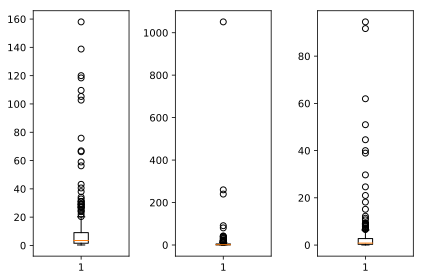

In [31]:
# Put any code you might need here
plt.subplot(131)
plt.boxplot(flint_data["Pb Bottle 1 (ppb) - First Draw"])

plt.subplot(132)
plt.boxplot(flint_data["Pb Bottle 2 (ppb) - 45 secs flushing"])

plt.subplot(133)
plt.boxplot(flint_data["Pb Bottle 3 (ppb) - 2 mins flushing"])

plt.tight_layout()


### Quick summary of the data: describe

Use the `describe` method to examine the properties of the entire dataframe for each of the columns of data.

- What kind of information is `describe()` giving me?
- Does it make sense for all the types of data in my dataset?
- Are there any parts of the data where `describe()` seems...less than helpful?

In [22]:
# Put your code for testing out the "describe" function here
flint_data.describe()

,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 3 (ppb) - 2 mins flushing,SampleID,Ward,Zip Code
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,10.645993,10.301144,3.660705,150.856089,5.313653,48505.103321
std,21.560778,67.531251,10.538500,86.308950,2.668291,3.114546
min,0.344000,0.032000,0.031000,1.000000,0.000000,48502.000000
25%,1.578000,0.460000,0.306000,77.500000,3.000000,48503.000000
50%,3.521000,1.400000,0.831000,149.000000,6.000000,48505.000000
75%,9.050000,4.806500,2.740500,224.500000,8.000000,48506.000000
max,158.000000,1051.000000,94.520000,300.000000,9.000000,48532.000000


### Data Transforming

As you might have already learned earlier in the course, data almost always comes to you in an imperfect form and you need to perform cleaning and transforming. 

The lead sample readings are in ppb (parts per billion). But, the U.S. Environmental Protection Agency's guidelines are expressed in mg/L, or milligrams per liter. **What will we need to do in order to compare the data collected to the EPA's guideline threshold?**

*Note*: 1 part-per-million, or 1ppm, equals 1 milligram per liter (1mg/L)

Review this unit conversion:

$$ x \text{ ppb} \times \frac{1 \text{ ppm}}{1000 \text{ ppb}} \times \frac{1 \text{ mg/L}}{1 \text{ ppm}} $$

Would this give you the units that you want?

In [62]:
# Write any python you need to here
flint_data["Pb Bottle 1 (mg/l) - First Draw"] = (flint_data["Pb Bottle 1 (ppb) - First Draw"])/1000
# Create a new column and assign its value to be a draw column divided by 1000
# (You'll need to transfom the data for the other readings as well!)
flint_data["Pb Bottle 2 (mg/l) - 45 secs flushing"] = (flint_data["Pb Bottle 2 (ppb) - 45 secs flushing"])/1000

flint_data["Pb Bottle 3 (mg/l) - 2 mins flushing"] = (flint_data["Pb Bottle 3 (ppb) - 2 mins flushing"])/1000
# Check to see if it worked
flint_data.head()


,Notes,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 3 (ppb) - 2 mins flushing,SampleID,Ward,Zip Code,Pb Bottle 1 (mg/l) - First Draw,Pb Bottle 2 (mg/l) - 45 secs flushing,Pb Bottle 3 (mg/3) - 2 mins flushing,Pb Bottle 3 (mg/l) - 2 mins flushing
0,NaN,0.344,0.226,0.145,1,6,48504,0.000344,0.000226,0.000145,0.000145
1,NaN,8.133,10.770,2.761,2,9,48507,0.008133,0.010770,0.002761,0.002761
2,NaN,1.111,0.110,0.123,4,1,48504,0.001111,0.000110,0.000123,0.000123
3,NaN,8.007,7.446,3.384,5,8,48507,0.008007,0.007446,0.003384,0.003384
4,NaN,1.951,0.048,0.035,6,3,48505,0.001951,0.000048,0.000035,0.000035


### Thinking more about outliers

One way to find an outlier is through visualization of the data. But, as you might have already figured this out when you were thinking about outliers earlier, Pandas also offers a way to find values that satisfy a specific condition. **Review the following code to see the results matches any of the conclusion you came to above about the outliers in the data. Modify and test the code as needed to locate other outliers. You might want to explore outliers in the new columns you just created as well.**

In [54]:
# find outlier data for bottle 2
# -- how do you decide what would be considered an outlier?
# -- What is the "right" threshold?
outliers = (flint_data['Pb Bottle 2 (ppb) - 45 secs flushing'] > 10) | (flint_data["Pb Bottle 3 (ppb) - 2 mins flushing"] > 80)  | (flint_data["Pb Bottle 1 (ppb) - First Draw"] > 100)
flint_data[outliers]

# You should check for other outliers in the other sample as well.

,Notes,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 3 (ppb) - 2 mins flushing,SampleID,Ward,Zip Code,Pb Bottle 1 (mg/l) - First Draw,Pb Bottle 2 (mg/l) - 45 secs flushing,Pb Bottle 3 (mg/3) - 2 mins flushing,Pb Bottle 3 (mg/l) - 2 mins flushing
1,NaN,8.133,10.770,2.761,2,9,48507,0.008133,0.010770,0.002761,0.002761
19,NaN,120.000,239.700,29.710,24,6,48504,0.120000,0.239700,0.029710,0.029710
21,NaN,16.520,10.260,2.762,26,5,48505,0.016520,0.010260,0.002762,0.002762
26,*house sampled twice,6.087,28.870,2.130,31,7,48503,0.006087,0.028870,0.002130,0.002130
27,*house sampled twice,10.320,13.470,18.190,31,7,48503,0.010320,0.013470,0.018190,0.018190
30,NaN,109.600,80.470,94.520,35,6,48504,0.109600,0.080470,0.094520,0.094520
51,NaN,30.910,42.580,44.600,56,8,48503,0.030910,0.042580,0.044600,0.044600
58,NaN,105.300,12.840,4.534,67,7,48503,0.105300,0.012840,0.004534,0.004534
73,NaN,102.700,9.894,3.133,83,6,48504,0.102700,0.009894,0.003133,0.003133
81,NaN,75.820,11.650,3.942,93,2,48504,0.075820,0.011650,0.003942,0.003942


// write any markdown here - explain what you did in the cells above!

### Getting a Sense of the Data

What's the mean value of each column for the lead readings? Is there a pandas function you can use for this?

In [51]:
# Put your code here
flint_data.mean()

Pb Bottle 1 (ppb) - First Draw              10.645993
Pb Bottle 2 (ppb) - 45 secs flushing        10.301144
Pb Bottle 3 (ppb) - 2 mins flushing          3.660705
SampleID                                   150.856089
Ward                                         5.313653
Zip Code                                 48505.103321
Pb Bottle 1 (mg/l) - First Draw              0.010646
Pb Bottle 2 (mg/l) - 45 secs flushing        0.010301
Pb Bottle 3 (mg/3) - 2 mins flushing         0.003661
Pb Bottle 3 (mg/l) - 2 mins flushing         0.003661
dtype: float64

// write any markdown here to explain what you did in the cells above!

Do you think the mean value is representative of how good (or bad) the overall lead levels in Flint water? If so, why; if not, why not? 

**Really take some time to think this one through.** 
nah probably not, there are a lot of ourtliers. where some are wayyyy worse than others and that scews the data to be a lot higher. 

Try to justify your group's opinions by using plots, calculations, or anything else you feel appropriately supports your point. Examine the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) for some **new types of plots** that might be useful for achieving these goals.

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


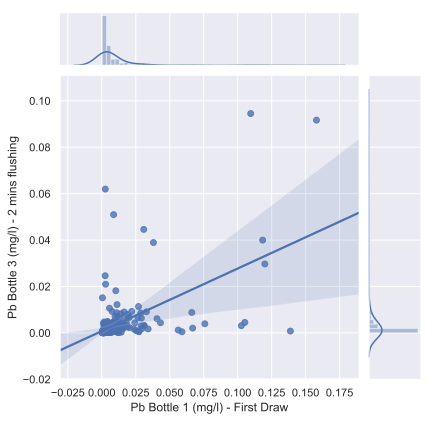

In [78]:
# Add your code here.
# Use Seaborn for your plots.
# In order to make a seaborn style plot, you'll need to import seaborn as use the "set()" function
# let the instructor know if you run into issues with this.
import seaborn as sns
sns.set()
sns.jointplot(flint_data['Pb Bottle 1 (mg/l) - First Draw'],flint_data['Pb Bottle 3 (mg/l) - 2 mins flushing'],kind="regplot")


// write any markdown notes here

How does the mean value for all the readings compare to the EPA's "action level"?  What about the range of values from the readings?  As a reminder, here's what the EPA guidelines say:

> Lead and copper are regulated by a treatment technique that requires systems to control the corrosiveness of their water. If more than 10% of tap water samples exceed the action level, water systems must take additional steps. For copper, the action level is 1.3 mg/L, and for lead is 0.015 mg/L. 
>
> Source: (http://www.epa.gov/your-drinking-water/table-regulated-drinking-water-contaminants#seven). 

**Write some code to try to determine whether or the measurements in this dataset would meet the EPA requirements**

In [76]:
# Write any python you need here
mask = flint_data["Pb Bottle 1 (mg/l) - First Draw"] > .015
bad_nums = flint_data[mask]
print("Flint Data Samples" , len(flint_data))
print("Samples with more than .015mg/L of Lead: ", len(bad_nums))
sample_percentage = len(bad_nums) / len(flint_data)
print(sample_percentage)
if len(bad_nums) > (len(flint_data)/10):
    print("Uh Oh")
else:
    print("All Good After Second Flush")
    

Flint Data Samples 271
Samples with more than .015mg/L of Lead:  45
0.16605166051660517
Uh Oh


**What did you find?**

When the instructors analyzed the data, they found that mean levels are below the action limit, but their analysis clearly showed that 16% of the samples exceeded the EPA action limit. Put another way, the 90th percentile of the readings is more than 1.5 times the EPA legal limit. 

**How does this compare to your analysis?**
Pretty similar, the worst water is definitely very bad. Not gooood

### Reflecting on your analysis

Is comparing the mean to the action level enough to tell us whether Flint had a definite problem with its drinking water? If so, why? If not, why not? 


If you were in a position to make a policy decision based on the data and the EPA guidelines, what recommendation would you make?

**Take some time to think this through. If you can, make a plot that you might show to a policy maker to make your point**

In [ ]:
# Write any additional python you might need to here


// record your thoughts in this markdown cell
Using one descriptive measuer is pretty bad. Also set some type of extra limit for the 90th percentile of data too? that'd probably help

---

<img src="http://america.aljazeera.com/content/ajam/articles/2015/10/19/michigan-admits-mistakes-in-flint-water-testing/jcr:content/headlineImage.adapt.1460.high.Flint_Hed_20151019.1445295000666.jpg" width=400px>

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [79]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/RigypefUkydY2WM43" 
	width="800" 
	height="600" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the submission link for Day 16, and upload everything there. Make sure your name is on it!